In [10]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
def load_all_results(results_dir='results'):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('history_experiment_') and filename.endswith('.json'):
            filepath = os.path.join(results_dir, filename)
            with open(filepath, 'r') as f:
                history = json.load(f)
            results.append(history)
    return results


In [12]:
def process_results(results):
    best_fitness_list = []
    history_list = []
    
    for result in results:
        # Extrair informações de melhor fitness
        best_fitness_list.append({
            'experiment_id': result['experiment_id'],
            'repetition': result['repetition'],
            'best_train_v_measure': result['best_train_v_measure'],
            'best_test_v_measure': result['best_test_v_measure'],
            'best_individual': result['best_individual'],
            'config': result['config']
        })
        
        # Criar uma tupla ordenada da configuração excluindo 'experiment_id' e 'repetition'
        config_items = [(k, v) for k, v in result['config'].items() if k not in ['repetition']]
        config_tuple = tuple(sorted(config_items))
        
        # Adicionar ao histórico com identificação
        for generation_data in result['history']:
            history_record = generation_data.copy()
            history_record['experiment_id'] = result['experiment_id']
            history_record['repetition'] = result['repetition']
            history_record['config_tuple'] = config_tuple  # Armazenar como tupla sem 'repetition' e 'experiment_id'
            history_list.append(history_record)
    
    # Criar DataFrames
    df_best_fitness = pd.DataFrame(best_fitness_list)
    df_history = pd.DataFrame(history_list)
    
    return df_best_fitness, df_history


In [13]:
# Carregar todos os resultados
results = load_all_results('results')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_best_fitness

,experiment_id,repetition,best_train_v_measure,best_test_v_measure,best_individual,config
0,1,0,0.144754,0.125856,operators['+'](operators['*'](operators['+'](x...,"{'population_size': 30, 'num_generations': 30,..."
1,1,1,0.150427,0.115199,operators['-'](operators['*'](operators['-'](o...,"{'population_size': 30, 'num_generations': 30,..."
2,1,2,0.141908,0.116980,"operators['-'](operators['-'](x0, x0), operato...","{'population_size': 30, 'num_generations': 30,..."
3,1,3,0.167674,0.162655,"operators['*'](operators['-'](x9, operators['+...","{'population_size': 30, 'num_generations': 30,..."
4,1,4,0.156886,0.127036,"operators['+'](operators['+'](x2, operators['*...","{'population_size': 30, 'num_generations': 30,..."
5,1,5,0.152481,0.120540,"operators['*'](x10, operators['+'](x10, operat...","{'population_size': 30, 'num_generations': 30,..."
6,1,6,0.140722,0.134583,"operators['*'](x3, operators['*'](operators['+...","{'population_size': 30, 'num_generations': 30,..."
7,1,7,0.137310,0.133764,"operators['-'](operators['*'](x10, x10), x4)","{'population_size': 30, 'num_generations': 30,..."
8,1,8,0.167604,0.123463,operators['*'](operators['-'](operators['+'](o...,"{'population_size': 30, 'num_generations': 30,..."
9,1,9,0.157268,0.132873,operators['-'](operators['*'](operators['+'](o...,"{'population_size': 30, 'num_generations': 30,..."


In [14]:
df_history

,generation,best_fitness,min_fitness,average_fitness,experiment_id,repetition,config_tuple
0,0,0.027658,0.004156,0.011456,1,0,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
1,1,0.027658,0.003495,0.012243,1,0,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
2,2,0.030528,0.007616,0.013930,1,0,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
3,3,0.039380,0.005376,0.015562,1,0,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
4,4,0.039380,0.006671,0.018292,1,0,"((crossover_prob, 0.9), (experiment_id, 1), (m..."
...,...,...,...,...,...,...,...
2235,45,0.161891,0.021747,0.140440,6,9,"((crossover_prob, 0.9), (experiment_id, 6), (m..."
2236,46,0.161891,0.052292,0.146679,6,9,"((crossover_prob, 0.9), (experiment_id, 6), (m..."
2237,47,0.161891,0.013947,0.135417,6,9,"((crossover_prob, 0.9), (experiment_id, 6), (m..."
2238,48,0.161891,0.007369,0.128879,6,9,"((crossover_prob, 0.9), (experiment_id, 6), (m..."


In [15]:
# Adicionar uma coluna 'config_tuple' ao DataFrame de melhores fitness
df_best_fitness['config_tuple'] = df_best_fitness['config'].apply(
    lambda x: tuple(sorted((k, v) for k, v in x.items() if k not in ['repetition']))
)

# Agrupar por configuração
grouped = df_best_fitness.groupby('config_tuple')

# Calcular estatísticas
stats = grouped.agg({
    'best_train_v_measure': ['mean', 'std', 'max'],
    'best_test_v_measure': ['mean', 'std', 'max']
}).reset_index()

# Ajustar os nomes das colunas
stats.columns = ['config_tuple', 
                 'train_mean', 'train_std', 'train_max',
                 'test_mean', 'test_std', 'test_max']

# Ordenar para encontrar as melhores configurações
stats_sorted_train = stats.sort_values('train_mean', ascending=False)
stats_sorted_test = stats.sort_values('test_mean', ascending=False)

# Exibir as melhores configurações
print("Melhores Configurações Baseadas no Fitness de Treino:")
print(stats_sorted_train.head())

print("\nMelhores Configurações Baseadas no Fitness de Teste:")
print(stats_sorted_test.head())


Melhores Configurações Baseadas no Fitness de Treino:
                                        config_tuple  train_mean  train_std  \
2  ((crossover_prob, 0.9), (experiment_id, 3), (m...    0.162811   0.019352   
1  ((crossover_prob, 0.9), (experiment_id, 2), (m...    0.155847   0.021228   
4  ((crossover_prob, 0.9), (experiment_id, 6), (m...    0.154970   0.012154   
3  ((crossover_prob, 0.9), (experiment_id, 5), (m...    0.153238   0.011059   
0  ((crossover_prob, 0.9), (experiment_id, 1), (m...    0.151704   0.010750   

   train_max  test_mean  test_std  test_max  
2   0.180756   0.140048  0.014679  0.166057  
1   0.173794   0.133470  0.016282  0.154049  
4   0.166999   0.116160  0.012407  0.134391  
3   0.167580   0.132905  0.013867  0.157573  
0   0.167674   0.129295  0.013547  0.162655  

Melhores Configurações Baseadas no Fitness de Teste:
                                        config_tuple  train_mean  train_std  \
2  ((crossover_prob, 0.9), (experiment_id, 3), (m...    0.1628

In [16]:
# Melhor configuração de treino
best_config_train = stats_sorted_train.iloc[0]
best_config_tuple_train = best_config_train['config_tuple']
best_config_identifier_train = dict(best_config_tuple_train)

print("\nMelhor Configuração de Treino:")
print(best_config_identifier_train)
print("Melhor Fitness de Treino:", best_config_train['train_max'])
print("Média da Fitness de Treino:", best_config_train['train_mean'])
print("Desvio Padrão da Fitness de Treino:", best_config_train['train_std'])

# Melhor configuração de teste
best_config_test = stats_sorted_test.iloc[0]
best_config_tuple_test = best_config_test['config_tuple']
best_config_identifier_test = dict(best_config_tuple_test)

print("\nMelhor Configuração de Teste:")
print(best_config_identifier_test)
print("Melhor Fitness de Teste:", best_config_test['test_max'])
print("Média da Fitness de Teste:", best_config_test['test_mean'])
print("Desvio Padrão da Fitness de Teste:", best_config_test['test_std'])



Melhor Configuração de Treino:
{'crossover_prob': 0.9, 'experiment_id': 3, 'mutation_prob': 0.05, 'num_generations': 100, 'population_size': 30, 'tournament_size': 2}
Melhor Fitness de Treino: 0.18075558294386657
Média da Fitness de Treino: 0.16281127171290863
Desvio Padrão da Fitness de Treino: 0.019352222520346577

Melhor Configuração de Teste:
{'crossover_prob': 0.9, 'experiment_id': 3, 'mutation_prob': 0.05, 'num_generations': 100, 'population_size': 30, 'tournament_size': 2}
Melhor Fitness de Teste: 0.16605733311386994
Média da Fitness de Teste: 0.14004806108567203
Desvio Padrão da Fitness de Teste: 0.01467919724325755


In [17]:
def plot_fitness_evolution(df_history, config_tuple, config_identifier):
    # Filtrar os dados para a configuração específica
    print(config_tuple)
    df_config = df_history[df_history['config_tuple'] == config_tuple]
    
    if df_config.empty:
        print("Nenhum dado encontrado para a configuração especificada.")
        return
    
    # Agrupar por geração
    grouped = df_config.groupby('generation')
    
    # Calcular estatísticas
    stats = grouped.agg({
        'best_fitness': ['mean', 'min', 'max', 'std']
    }).reset_index()
    
    # Ajustar os nomes das colunas
    stats.columns = ['generation', 'mean_best_fitness', 'min_best_fitness', 'max_best_fitness', 'std_best_fitness']
    
    # Plotar
    plt.figure(figsize=(12, 6))
    plt.plot(stats['generation'], stats['mean_best_fitness'], label='Média da Fitness', color='blue')
    plt.plot(stats['generation'], stats['min_best_fitness'], label='Mínima Fitness', linestyle='--', color='green')
    plt.plot(stats['generation'], stats['max_best_fitness'], label='Máxima Fitness', linestyle='--', color='red')
    plt.fill_between(stats['generation'], 
                     stats['mean_best_fitness'] - stats['std_best_fitness'], 
                     stats['mean_best_fitness'] + stats['std_best_fitness'], 
                     color='gray', alpha=0.2, label='Desvio Padrão')
    
    plt.title(f'Evolução da Fitness - Configuração: {config_identifier}')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()


(('crossover_prob', 0.9), ('experiment_id', 3), ('mutation_prob', 0.05), ('num_generations', 100), ('population_size', 30), ('tournament_size', 2))


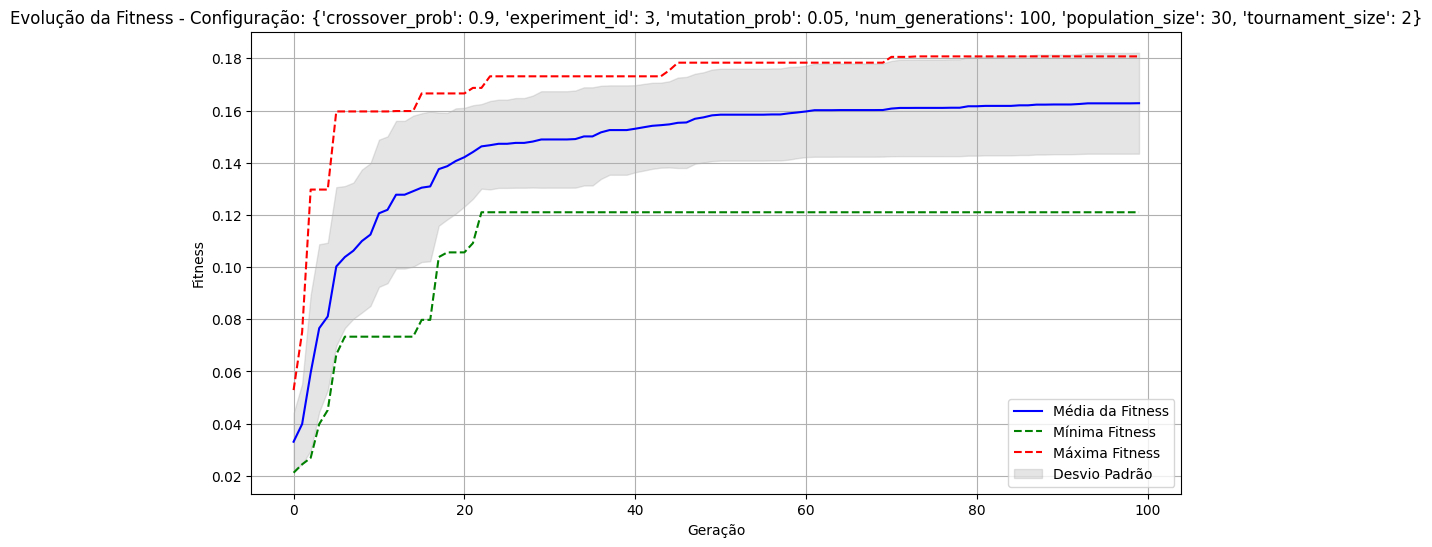

(('crossover_prob', 0.9), ('experiment_id', 3), ('mutation_prob', 0.05), ('num_generations', 100), ('population_size', 30), ('tournament_size', 2))


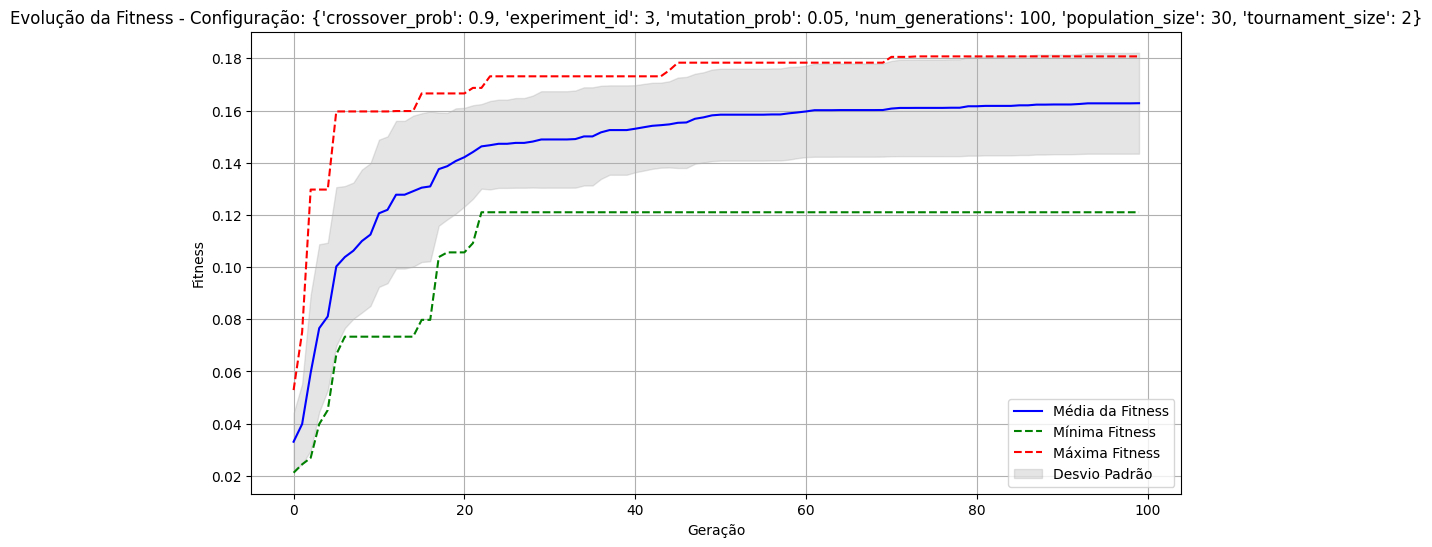

In [18]:
# Plotar para a melhor configuração de treino
plot_fitness_evolution(df_history, best_config_tuple_train, best_config_identifier_train)

# Plotar para a melhor configuração de teste
plot_fitness_evolution(df_history, best_config_tuple_test, best_config_identifier_test)
